# Understanding Data with Visualization
With the help of data visualization, we can see how the data looks like and what kind of correlation is held by the attributes of data.

<img src="pic/How-to-Visualize-your-Data-with-Charts-and-Graphs.jpg">

## Univariate Plots: Understanding Attributes Independently
The simplest type of visualization is single-variable or __“univariate”__ visualization. With the help of univariate visualization, we can understand each attribute of our dataset
independently. 

### Histograms
Histograms group the data in bins and is the fastest way to get idea about the distribution of each attribute in dataset. The following are some of the characteristics of histograms:

- It provides us a count of the number of observations in each bin created for visualization.

- From the shape of the bin, we can easily observe the distribution i.e. wethear it is Gaussian, skewed or exponential.

- Histograms also help us to see possible outliers.

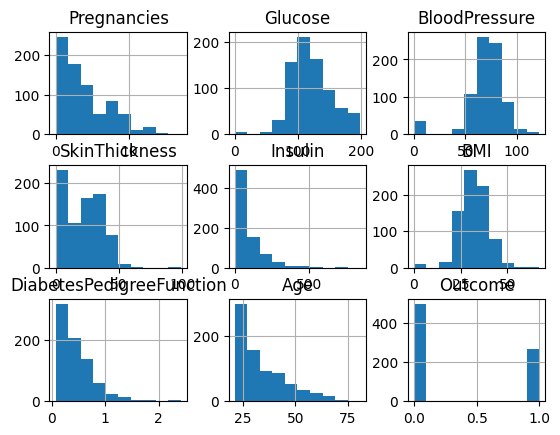

In [1]:
import matplotlib.pyplot as plt
from pandas import read_csv

path = 'diabetes.csv'
data = read_csv(path)
data.hist()
# Method 1: change figure size
# plt.figure(figsize=(16, 12))
# Method 2: 
plt.rcParams["figure.figsize"] = 16,12
plt.show()

Make the plot image larger by setting the __`figsize`__

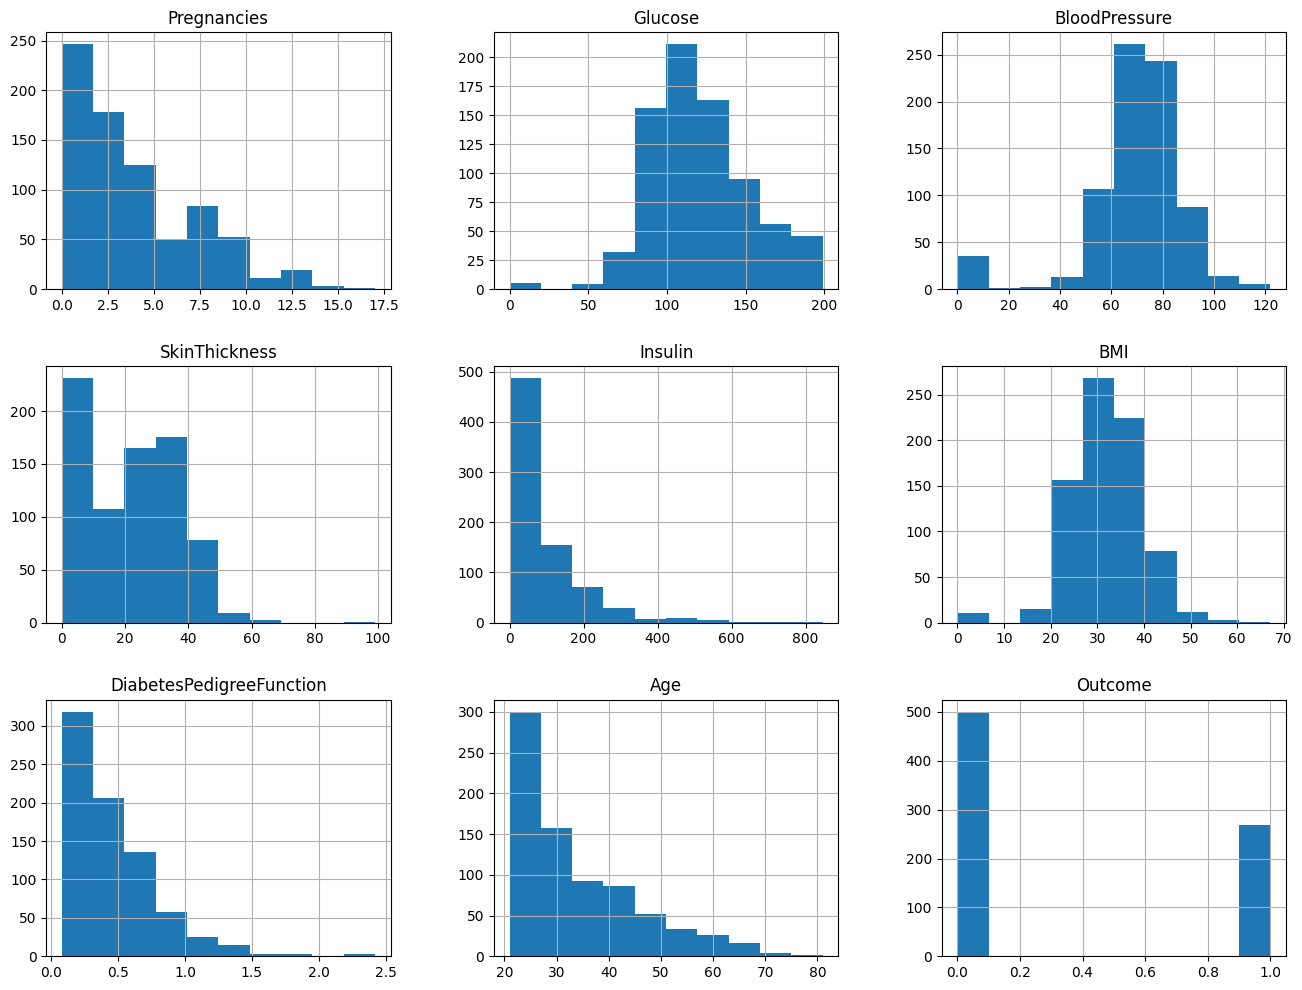

In [2]:
data.hist()
plt.rcParams["figure.figsize"] = 16,12
plt.show()

### Density Plots
Another quick and easy technique for getting each attributes distribution is Density plots. It is also like histogram but having a smooth curve drawn through the top of each bin. We
can call them as __abstracted histograms__.

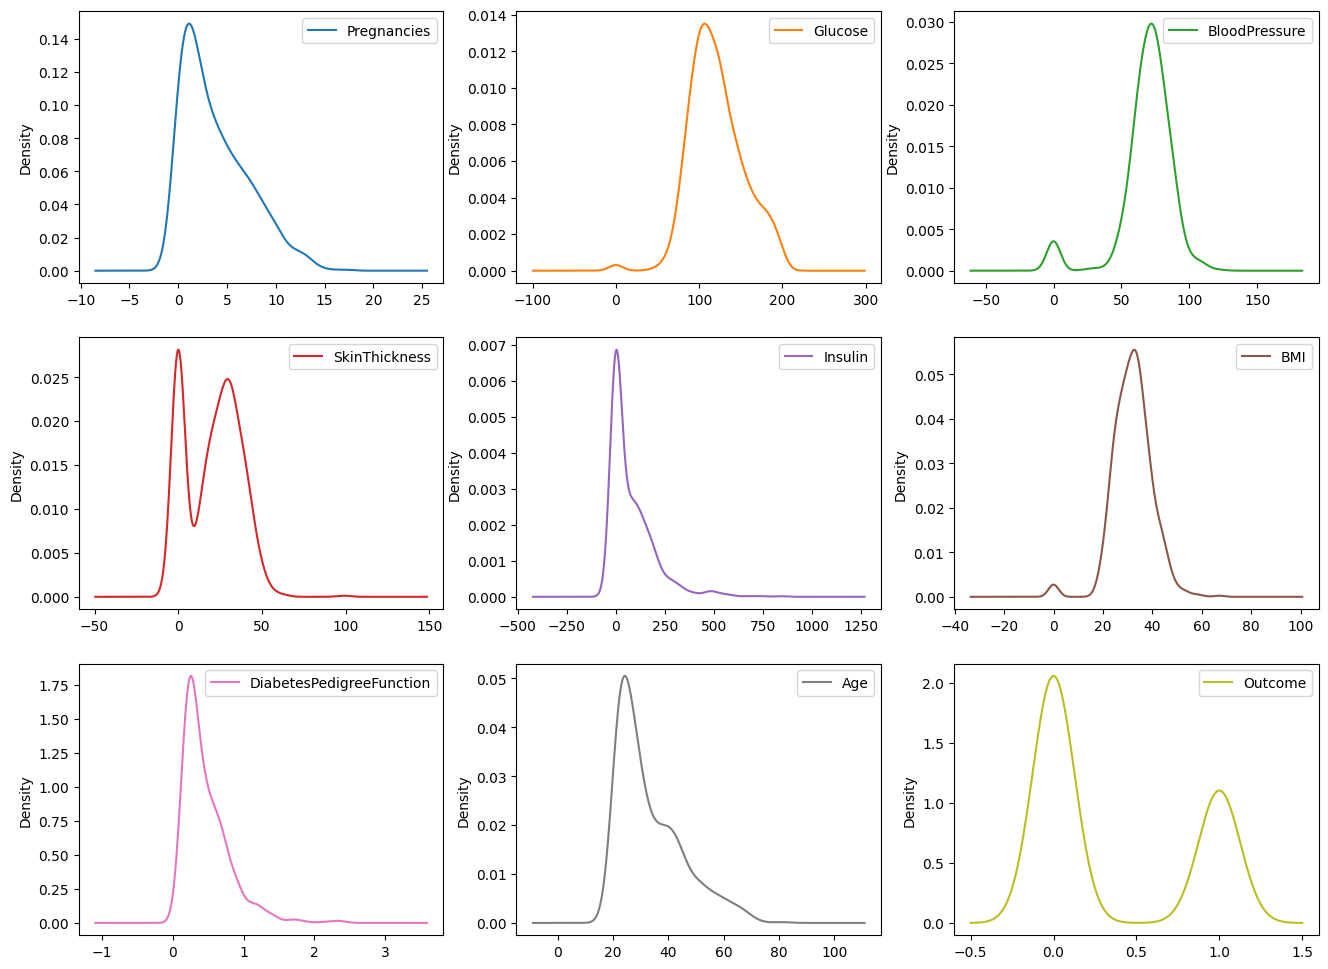

In [6]:
data.plot(kind='density', subplots=True, layout=(3, 3), sharex=False)
plt.show()

### Box and Whisker Plots
Box and Whisker plots, also called __`boxplots`__ in short, is another useful technique to review the distribution of each attribute’s distribution. The following are the characteristics of this technique:

- It is univariate in nature and summarizes the distribution of each attribute.
- It draws a line for the middle value i.e. for median.
- It draws a box around the 25% and 75%.
- It also draws whiskers which will give us an idea about the spread of the data.
- The dots outside the whiskers signifies the outlier values. Outlier values would be 1.5 times greater than the size of the spread of the middle data.


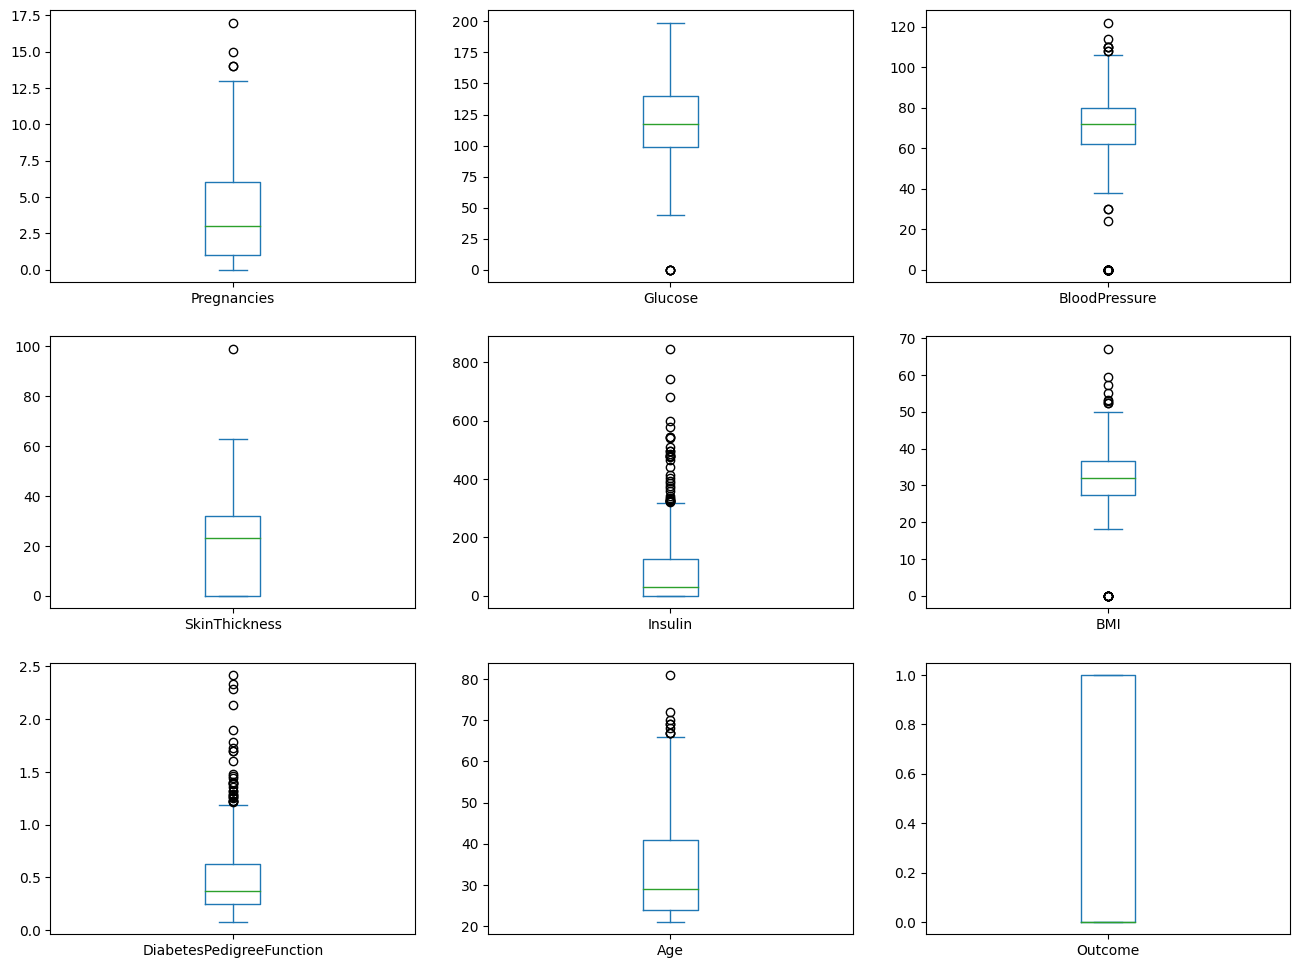

In [9]:
data.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.show()

### Pie Charts

Pie charts represent data with a small number of labels and given relative frequencies. They work well even with the labels that can’t be ordered (like nominal data). A pie chart is a circle divided into multiple slices. Each slice corresponds to a single distinct label from the dataset and has an area proportional to the relative frequency associated with that label.

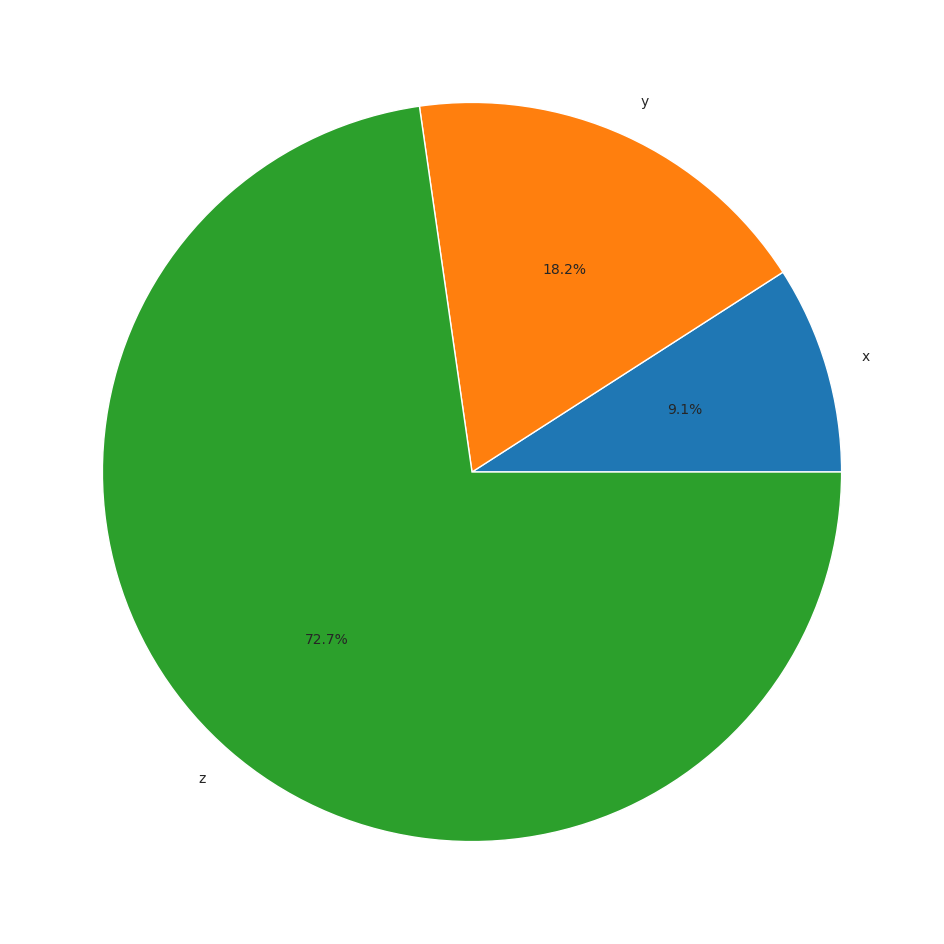

In [9]:
x, y, z = 128, 256, 1024

fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
# plt.figure(figsize=(8, 6))
# plt.rcParams["figure.figsize"] = 8,6
plt.show()

## Multivariate Plots: Interaction Among Multiple Variables
Another type of visualization is __multi-variable__ or __“multivariate”__ visualization. With the help of multivariate visualization, we can understand interaction between multiple attributes of our dataset. The following are some techniques in Python to implement multivariate visualization:

## Scatter Plot

The x-y plot or scatter plot represents the pairs of data from two datasets. The horizontal x-axis shows the values from the set x, while the vertical y-axis shows the corresponding values from the set y. You can optionally include the regression line and the correlation coefficient. 

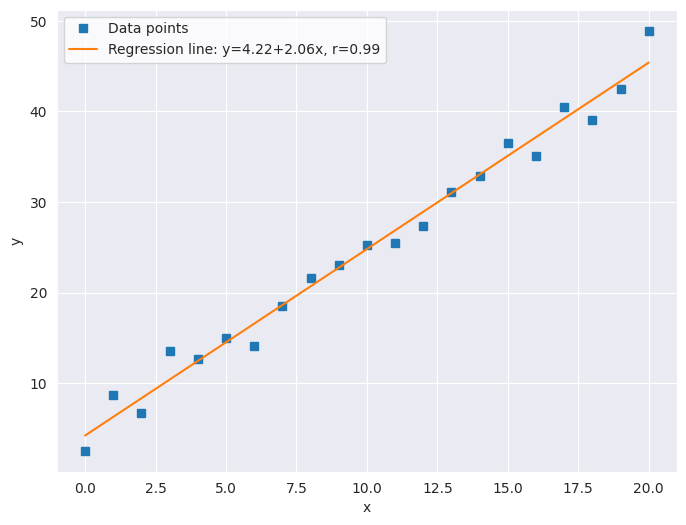

In [11]:
import numpy as np
import scipy

x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

### Correlation Matrix Plot
Correlation is an indication about the changes between two variables. The most popular correlation is Pearson’s Correlation. 

$$ pearson\,correlation\; r = cor(X, Y) = \dfrac{cov(X, Y)}{std(X)std(Y)}$$

We can plot correlation matrix to show which variable is having a high or low correlation in respect to another variable.

In [10]:
print(list(data.columns))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


[Text(0, 0, 'Pregnancies'),
 Text(0, 1, 'Glucose'),
 Text(0, 2, 'BloodPressure'),
 Text(0, 3, 'SkinThickness'),
 Text(0, 4, 'Insulin'),
 Text(0, 5, 'BMI'),
 Text(0, 6, 'DiabetesPedigreeFunction'),
 Text(0, 7, 'Age'),
 Text(0, 8, 'Outcome')]

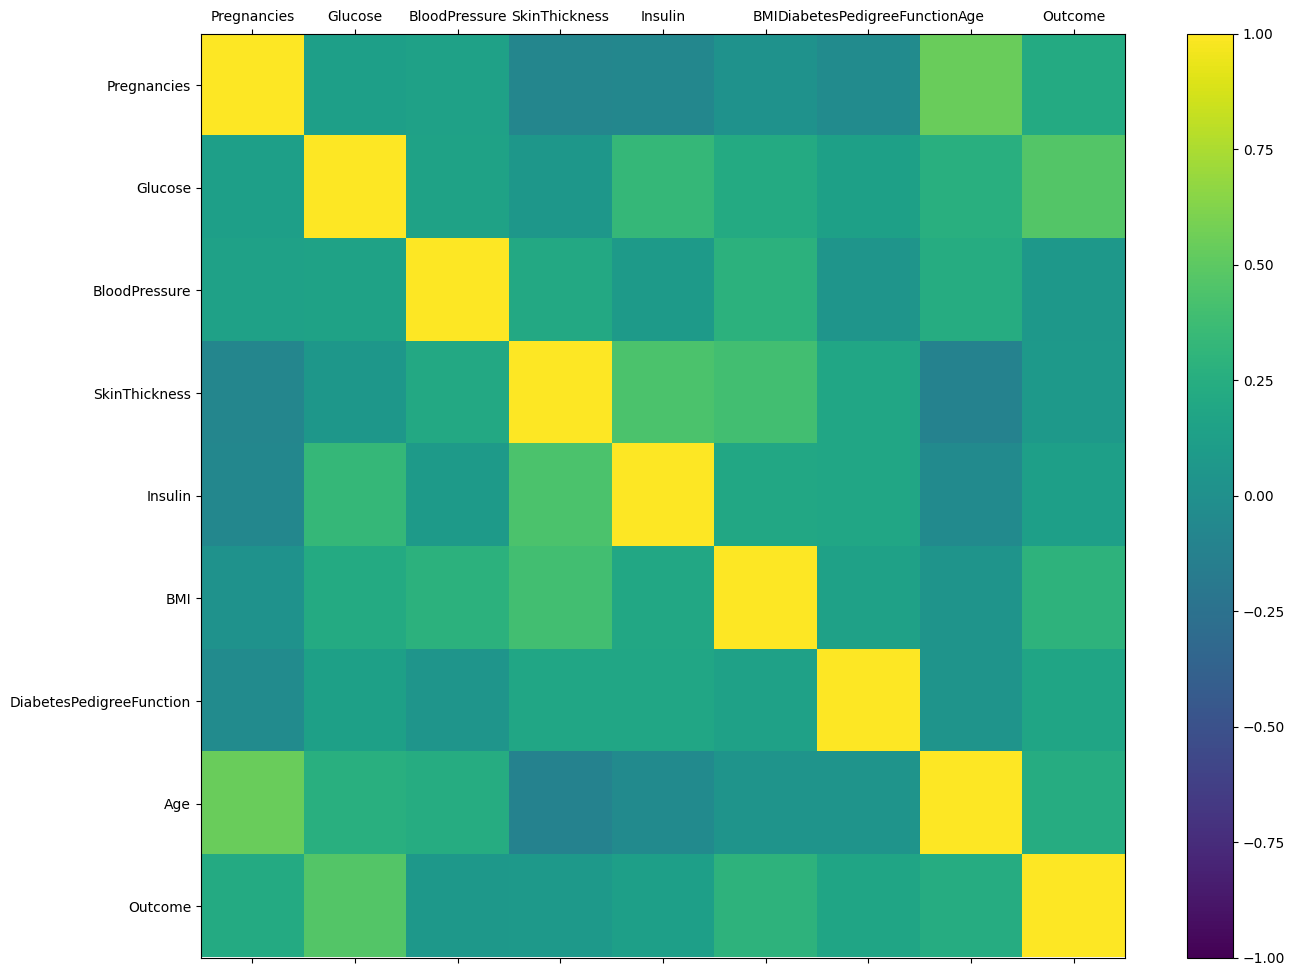

In [11]:
import numpy as np

correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(list(data.columns))
ax.set_yticklabels(list(data.columns))


From the above output of correlation matrix, we can see that it is symmetrical i.e. the bottom left is same as the top right. It is also observed that each variable is positively correlated with each other.

we can also use Seaborn to visualize it.

<AxesSubplot: >

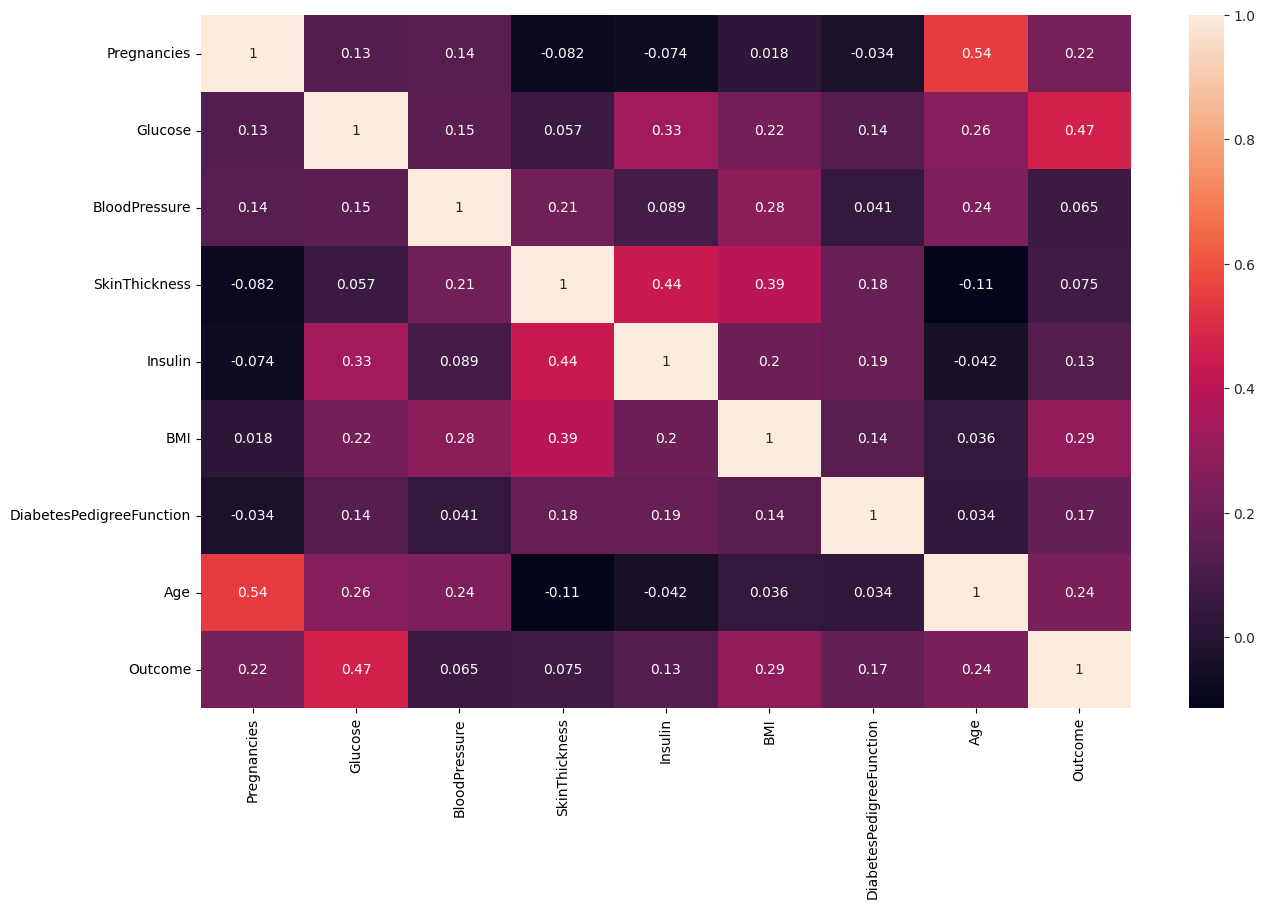

In [5]:
import seaborn as sns

plt.subplots(figsize=(15, 9))
sns.set_style("darkgrid")
sns.heatmap(data.corr(), annot=True)

## Scatter Matrix Plot
Scatter plots shows how much one variable is affected by another or the relationship between them with the help of dots in two dimensions.

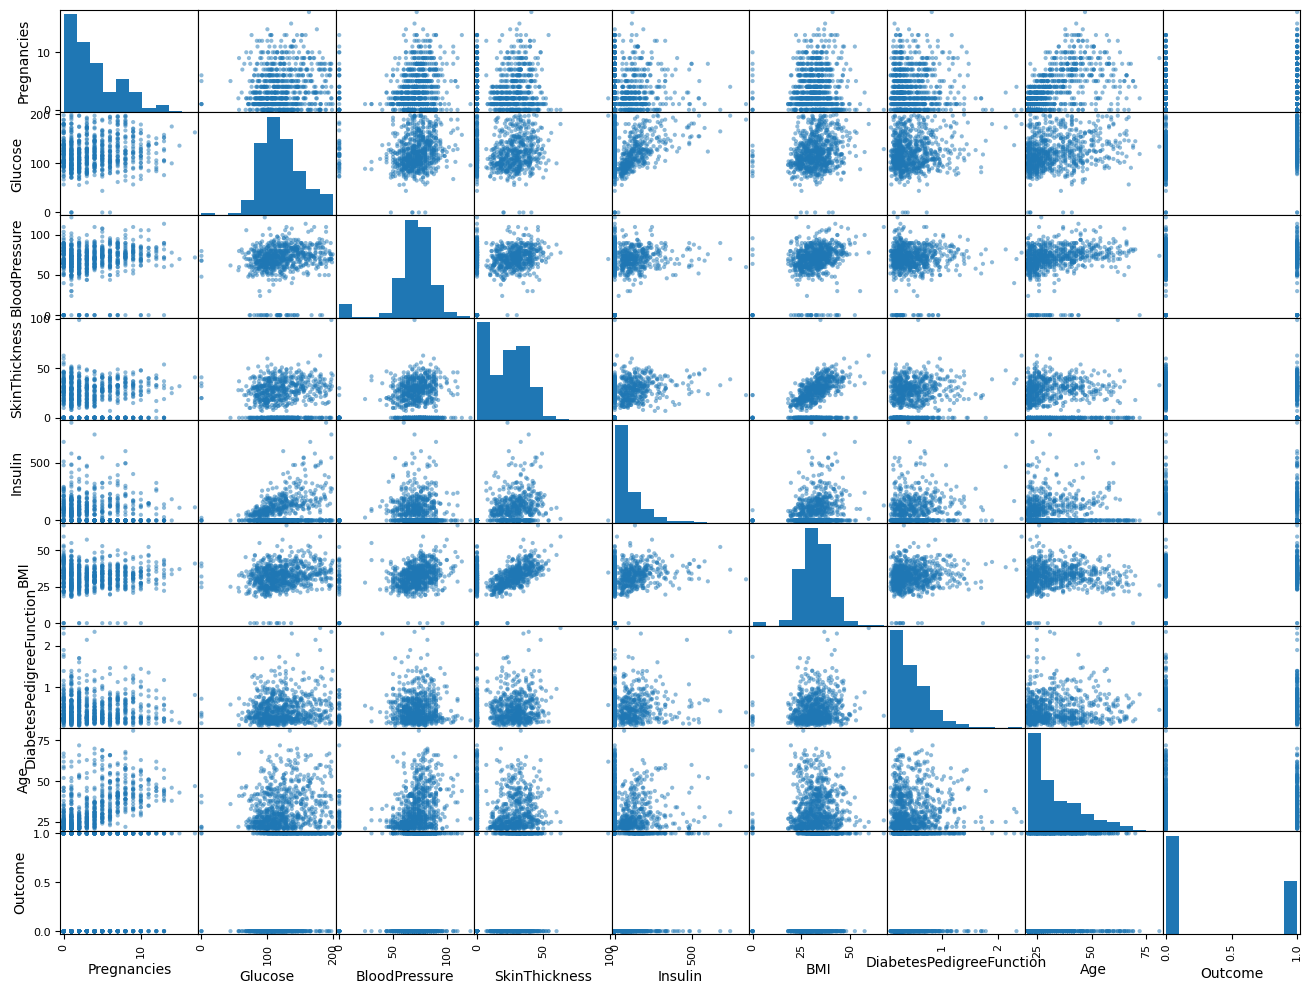

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(data)
plt.show()

You can also use Seaborn's pairplot function to visualize it.

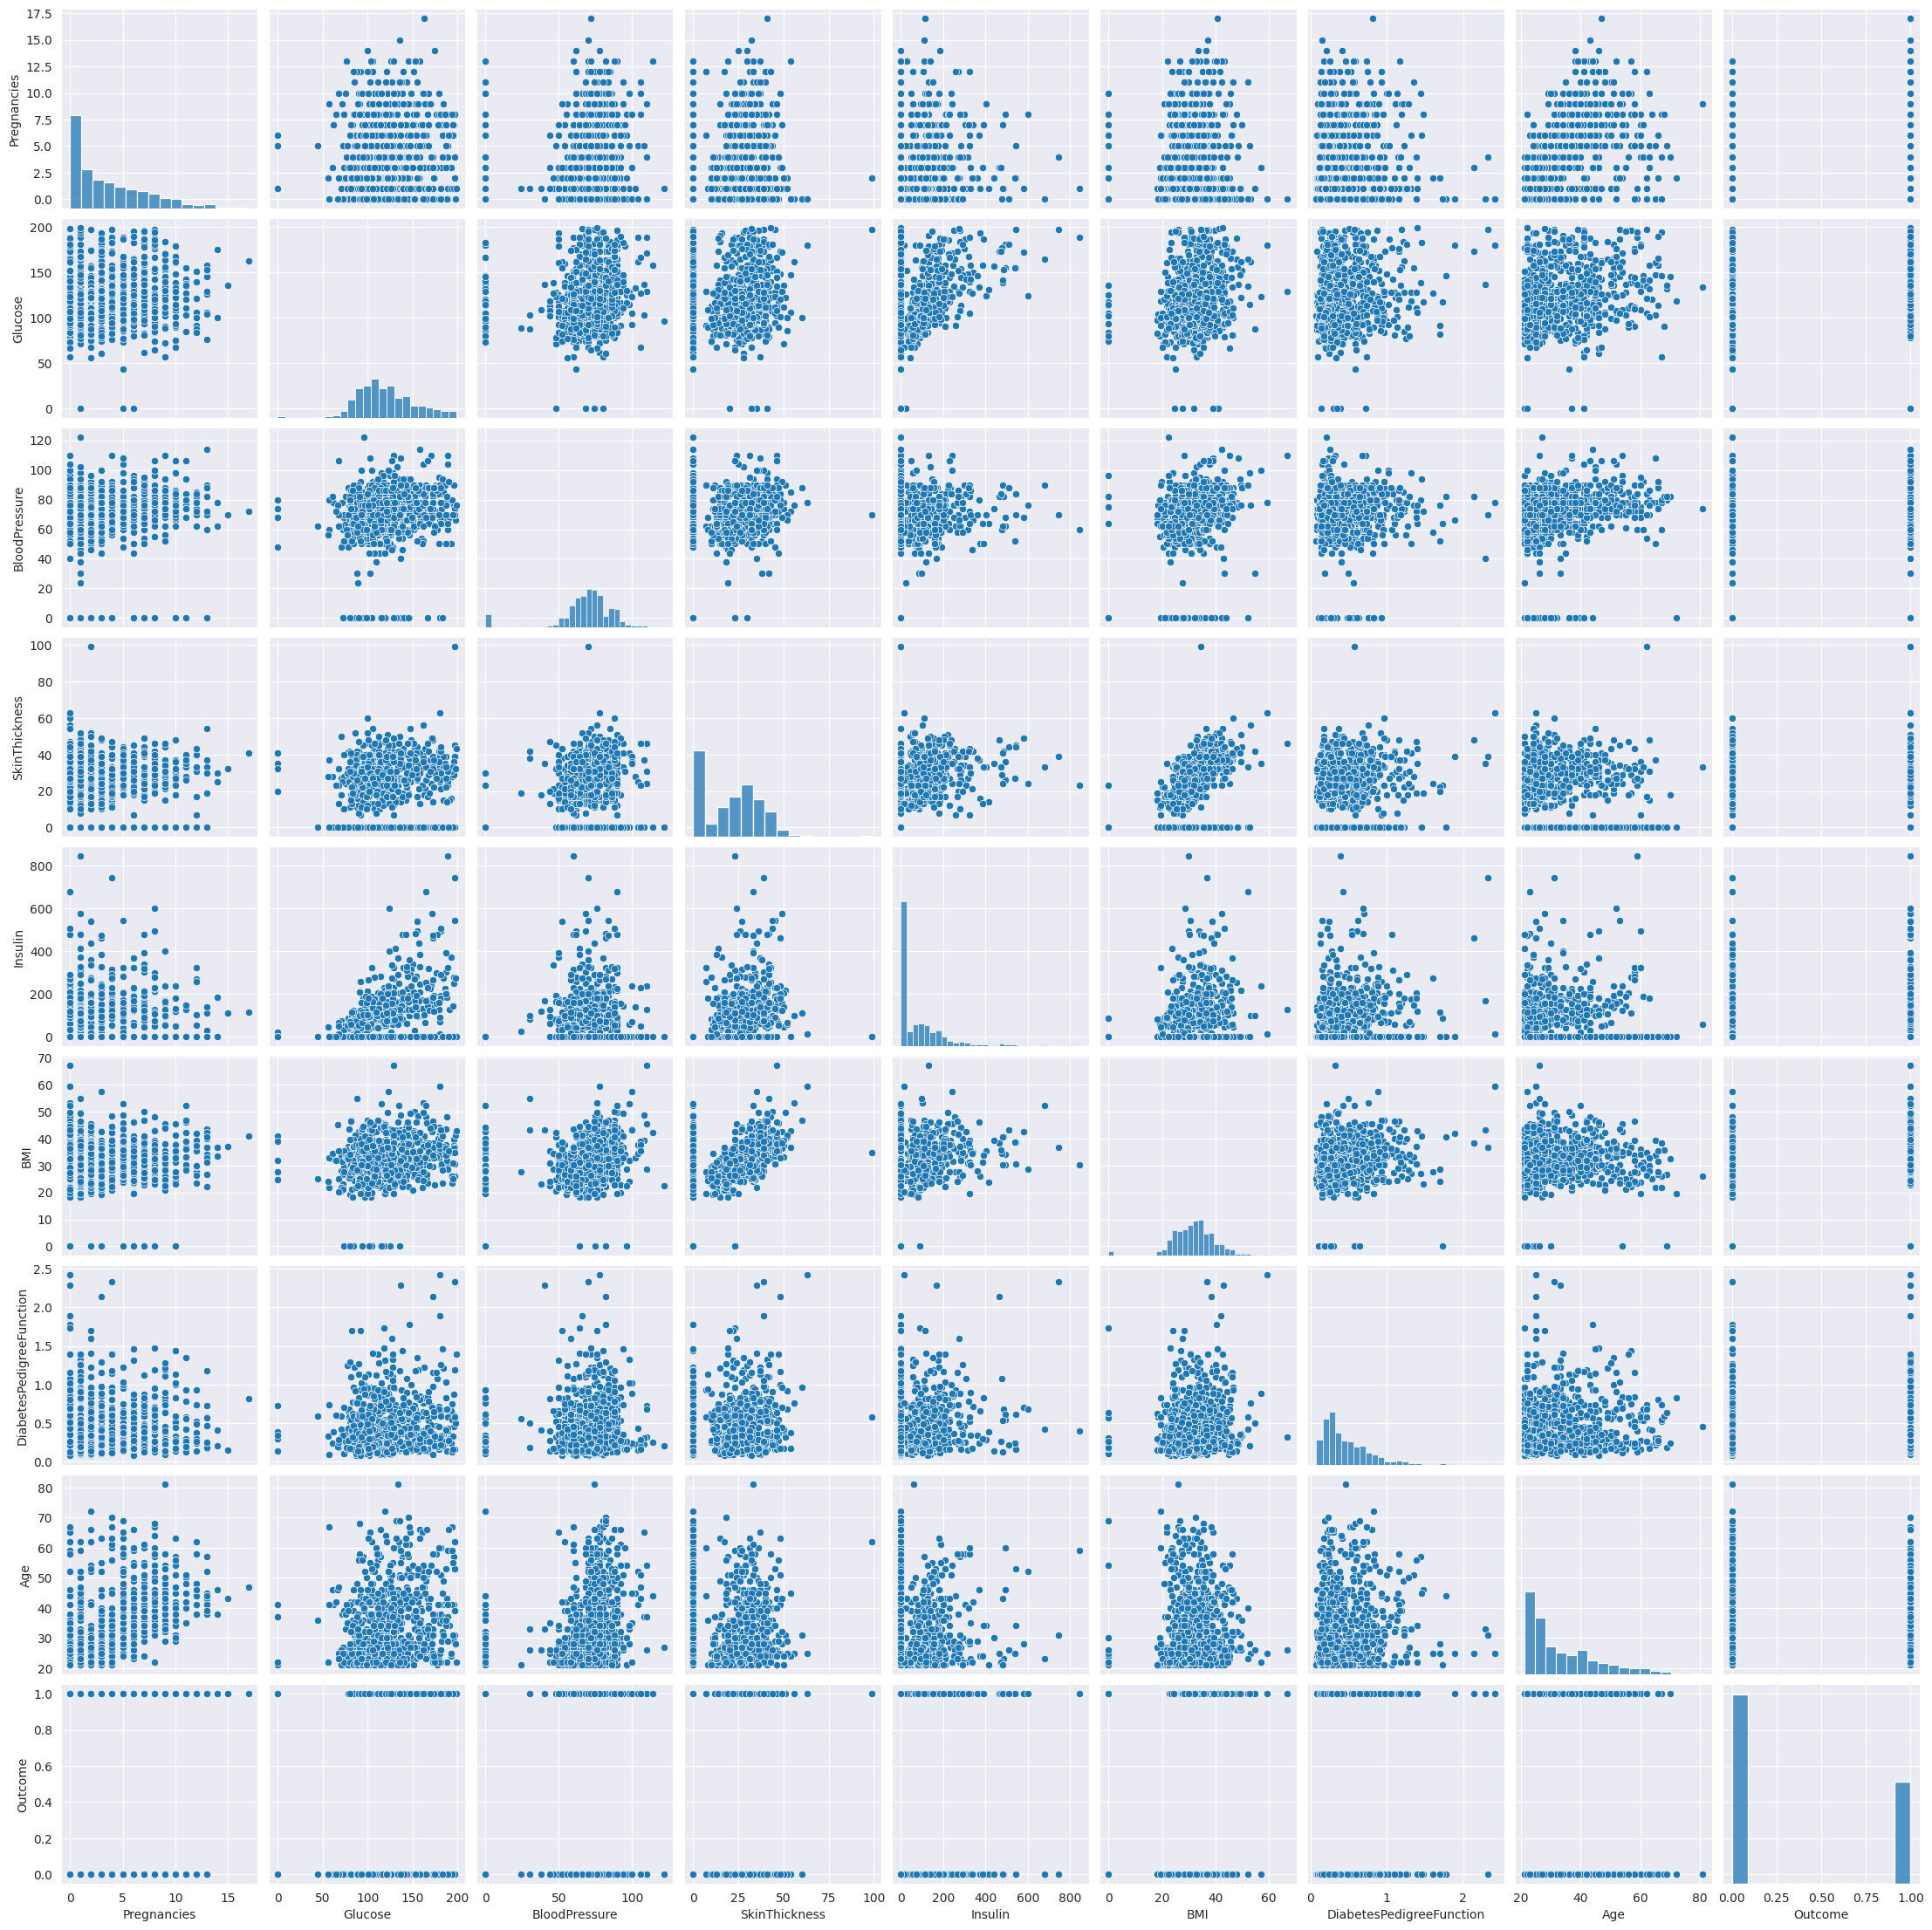

In [6]:
sns.pairplot(data)

## References

- [Python Statistics Fundamentals: How to Describe Your Data](https://realpython.com/python-statistics/)